# Employee Salary Prediction Dataset

## Overview

This dataset contains information about employees across various industries, job titles, education levels, and other features. The target variable is the **Salary**, which is influenced by factors such as the employee's age, years of experience, education level, job title, gender, city, industry, and department.

The dataset has been generated to simulate employee data and can be used for salary prediction models, regression analysis, and other machine learning tasks.

## Features

The dataset consists of the following columns:

- **Age**: Age of the employee (integer).
- **Gender**: Gender of the employee (`Male`, `Female`).
- **EducationLevel**: The highest level of education achieved by the employee. Possible values:
  - `High School`
  - `Bachelor`
  - `Master`
  - `PhD`
- **ExperienceYears**: Number of years of professional experience (integer).
- **JobTitle**: The employee's job title. Possible values:
  - `Data Scientist`
  - `Engineer`
  - `Manager`
  - `Sales Executive`
  - `Analyst`
- **City**: The city where the employee is based. Possible values:
  - `New York`
  - `San Francisco`
  - `Austin`
  - `Boston`
  - `Seattle`
- **Industry**: The industry the employee works in. Possible values:
  - `Tech`
  - `Finance`
  - `Healthcare`
  - `Education`
  - `Retail`
- **Department**: The department in which the employee works. Possible values:
  - `Engineering`
  - `Sales`
  - `Human Resources`
  - `Marketing`
  - `Finance`
- **Salary**: The salary of the employee (target variable). This is a continuous numerical value influenced by all other features.

## Dataset Size

The dataset contains 5,000 records of employee data, with each record representing an employee in a given company.

## Use Cases

This dataset can be used for:
- **Salary Prediction**: Train machine learning models to predict employee salaries based on the given features.
- **Regression Analysis**: Analyze the relationships between various features (such as education, experience, and industry) and salary.
- **Exploratory Data Analysis (EDA)**: Explore how different features impact salary, identify trends, and visualize data patterns.

## Source

This dataset is synthetically generated for the purpose of machine learning and statistical analysis.

## File Format

The dataset is provided in **CSV** format, and each row represents an employee's data with the associated salary.



### Importing neccesary libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import  r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [4]:
df=pd.read_csv('E:/ML projects/workspace/dataset/employee_salary_data.csv')

### Dataset overview

In [5]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,JobTitle,City,Industry,Department,Salary
0,59,Female,Bachelor,22,Analyst,Austin,Education,Sales,102626.11
1,32,Male,Master,24,Analyst,New York,Education,Marketing,107279.40
2,55,Male,Bachelor,29,Sales Executive,Austin,Education,Human Resources,106390.79
3,34,Male,Master,28,Sales Executive,Austin,Finance,Finance,110886.53
4,42,Male,Master,30,Analyst,Boston,Tech,Sales,129100.78


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              5000 non-null   int64  
 1   Gender           5000 non-null   object 
 2   EducationLevel   5000 non-null   object 
 3   ExperienceYears  5000 non-null   int64  
 4   JobTitle         5000 non-null   object 
 5   City             5000 non-null   object 
 6   Industry         5000 non-null   object 
 7   Department       5000 non-null   object 
 8   Salary           5000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 351.7+ KB


In [7]:
df.describe()

,Age,ExperienceYears,Salary
count,5000.000000,5000.000000,5000.000000
mean,39.876000,16.862600,103760.078020
std,11.110991,10.068624,15378.666135
min,21.000000,0.000000,50481.720000
25%,30.000000,8.000000,92799.587500
50%,40.000000,17.000000,103629.705000
75%,49.000000,25.000000,114284.252500
max,59.000000,34.000000,156514.760000


In [8]:
df.shape

(5000, 9)

In [9]:
df.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'JobTitle',
       'City', 'Industry', 'Department', 'Salary'],
      dtype='object')

### Checking for null values

In [10]:
df.isnull().sum()

Age                0
Gender             0
EducationLevel     0
ExperienceYears    0
JobTitle           0
City               0
Industry           0
Department         0
Salary             0
dtype: int64

### Checking for duplicated values

In [12]:
df.duplicated().sum()

np.int64(0)

### Converting categorical features to numerical features

In [13]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,JobTitle,City,Industry,Department,Salary
0,59,Female,Bachelor,22,Analyst,Austin,Education,Sales,102626.11
1,32,Male,Master,24,Analyst,New York,Education,Marketing,107279.40
2,55,Male,Bachelor,29,Sales Executive,Austin,Education,Human Resources,106390.79
3,34,Male,Master,28,Sales Executive,Austin,Finance,Finance,110886.53
4,42,Male,Master,30,Analyst,Boston,Tech,Sales,129100.78


#### EducationLevel

In [17]:
df.EducationLevel.unique()

array(['Bachelor', 'Master', 'High School', 'PhD'], dtype=object)

In [18]:
df['EducationLevel']=df['EducationLevel'].map({'Bachelor':0,'Master':1,'High School':2,'PhD':3})

In [20]:
df.EducationLevel.unique()

array([0, 1, 2, 3])

#### JobTitle

In [21]:
df.JobTitle.unique()

array(['Analyst', 'Sales Executive', 'Manager', 'Data Scientist',
       'Engineer'], dtype=object)

In [22]:
df['JobTitle']=df['JobTitle'].map({'Analyst':0, 'Sales Executive':1, 'Manager':2, 'Data Scientist':3,'Engineer':4})

In [23]:
df.JobTitle.unique()

array([0, 1, 2, 3, 4])

#### Gender

In [25]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [26]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [27]:
df.Gender.unique()

array([0, 1])

#### City

In [29]:
df.City.unique()

array(['Austin', 'New York', 'Boston', 'San Francisco', 'Seattle'],
      dtype=object)

In [30]:
df['City']=df['City'].map({'Austin':0, 'New York':1, 'Boston':2, 'San Francisco':3, 'Seattle':4})

In [31]:
df.City.unique()

array([0, 1, 2, 3, 4])

#### Industry

In [32]:
df.Industry.unique()

array(['Education', 'Finance', 'Tech', 'Healthcare', 'Retail'],
      dtype=object)

In [33]:
df['Industry']=df['Industry'].map({'Education':0, 'Finance':1, 'Tech':2, 'Healthcare':3, 'Retail':4})

In [34]:
df.Industry.unique()

array([0, 1, 2, 3, 4])

#### Department

In [35]:
df.Department.unique()

array(['Sales', 'Marketing', 'Human Resources', 'Finance', 'Engineering'],
      dtype=object)

In [36]:
df['Department']=df['Department'].map({'Sales':0, 'Marketing':1, 'Human Resources':2, 'Finance':3, 'Engineering':4})

In [37]:
df.Department.unique()

array([0, 1, 2, 3, 4])

In [38]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,JobTitle,City,Industry,Department,Salary
0,59,0,0,22,0,0,0,0,102626.11
1,32,1,1,24,0,1,0,1,107279.40
2,55,1,0,29,1,0,0,2,106390.79
3,34,1,1,28,1,0,1,3,110886.53
4,42,1,1,30,0,2,2,0,129100.78


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              5000 non-null   int64  
 1   Gender           5000 non-null   int64  
 2   EducationLevel   5000 non-null   int64  
 3   ExperienceYears  5000 non-null   int64  
 4   JobTitle         5000 non-null   int64  
 5   City             5000 non-null   int64  
 6   Industry         5000 non-null   int64  
 7   Department       5000 non-null   int64  
 8   Salary           5000 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 351.7 KB


### Exploratory Data Analysis

<Axes: xlabel='Salary', ylabel='Count'>

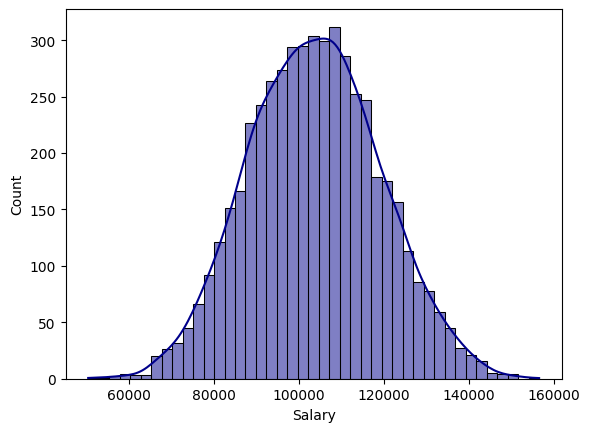

In [42]:
sns.histplot(x='Salary',data=df,kde=True,color='darkblue')

([<matplotlib.axis.XTick at 0x19cda9dfed0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

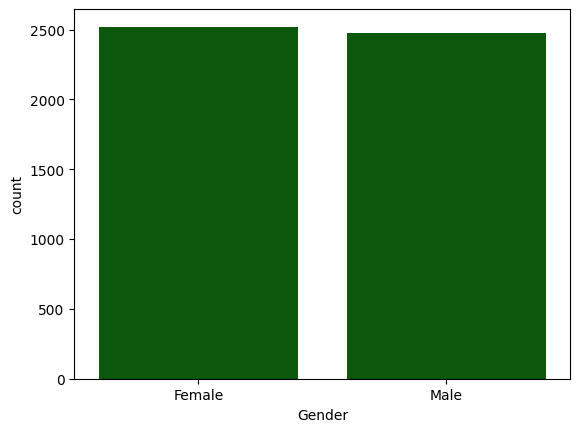

In [50]:
sns.countplot(x='Gender',data=df,color='darkgreen')
plt.xticks([0,1],['Female','Male'])

In [51]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,JobTitle,City,Industry,Department,Salary
0,59,0,0,22,0,0,0,0,102626.11
1,32,1,1,24,0,1,0,1,107279.40
2,55,1,0,29,1,0,0,2,106390.79
3,34,1,1,28,1,0,1,3,110886.53
4,42,1,1,30,0,2,2,0,129100.78


([<matplotlib.axis.XTick at 0x19cdb0aec10>,
 [Text(0, 0, 'Bachelor'),
  Text(1, 0, 'Master'),
  Text(2, 0, 'High School'),
  Text(3, 0, 'PhD')])

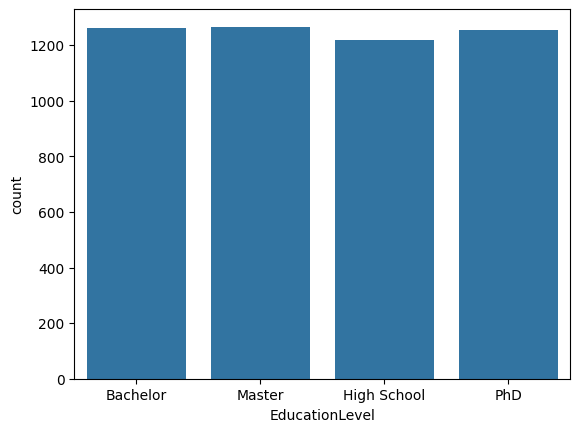

In [54]:
sns.countplot(x='EducationLevel',data=df)
plt.xticks([0,1,2,3],['Bachelor', 'Master', 'High School', 'PhD'])

<Axes: xlabel='ExperienceYears', ylabel='Count'>

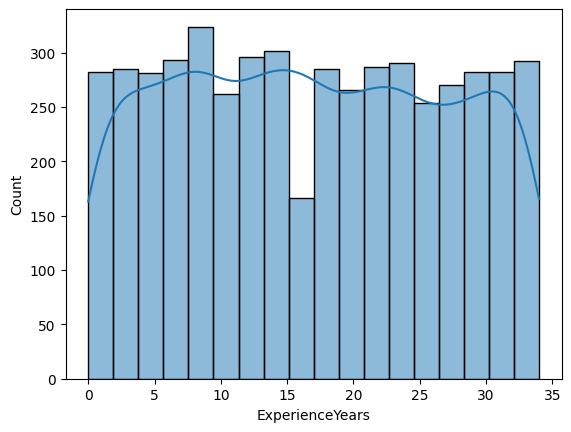

In [58]:
sns.histplot(x='ExperienceYears',data=df,kde=True)

<Axes: xlabel='Age', ylabel='ExperienceYears'>

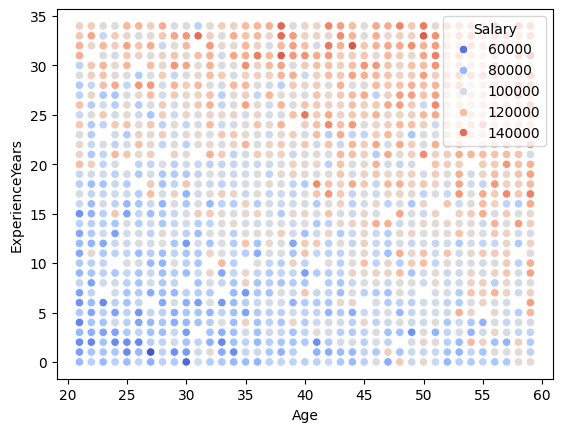

In [62]:
sns.scatterplot(x='Age',y='ExperienceYears',data=df,hue='Salary',palette='coolwarm')

<Axes: xlabel='ExperienceYears', ylabel='Salary'>

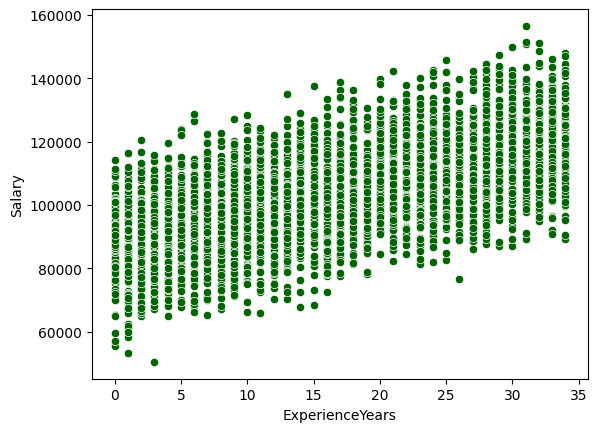

In [67]:
sns.scatterplot(x='ExperienceYears',y='Salary',data=df,color='darkgreen')

<Axes: >

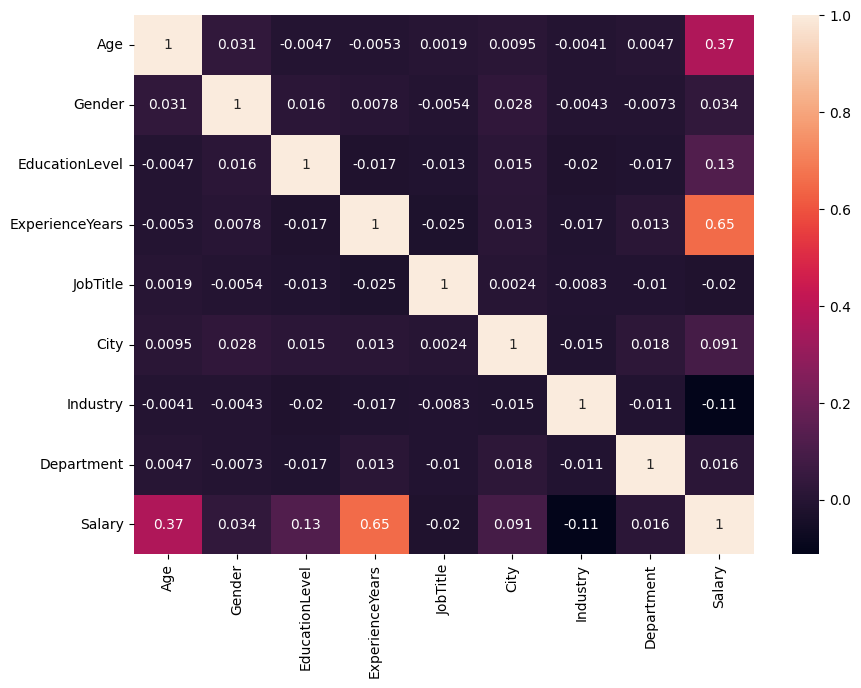

In [70]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

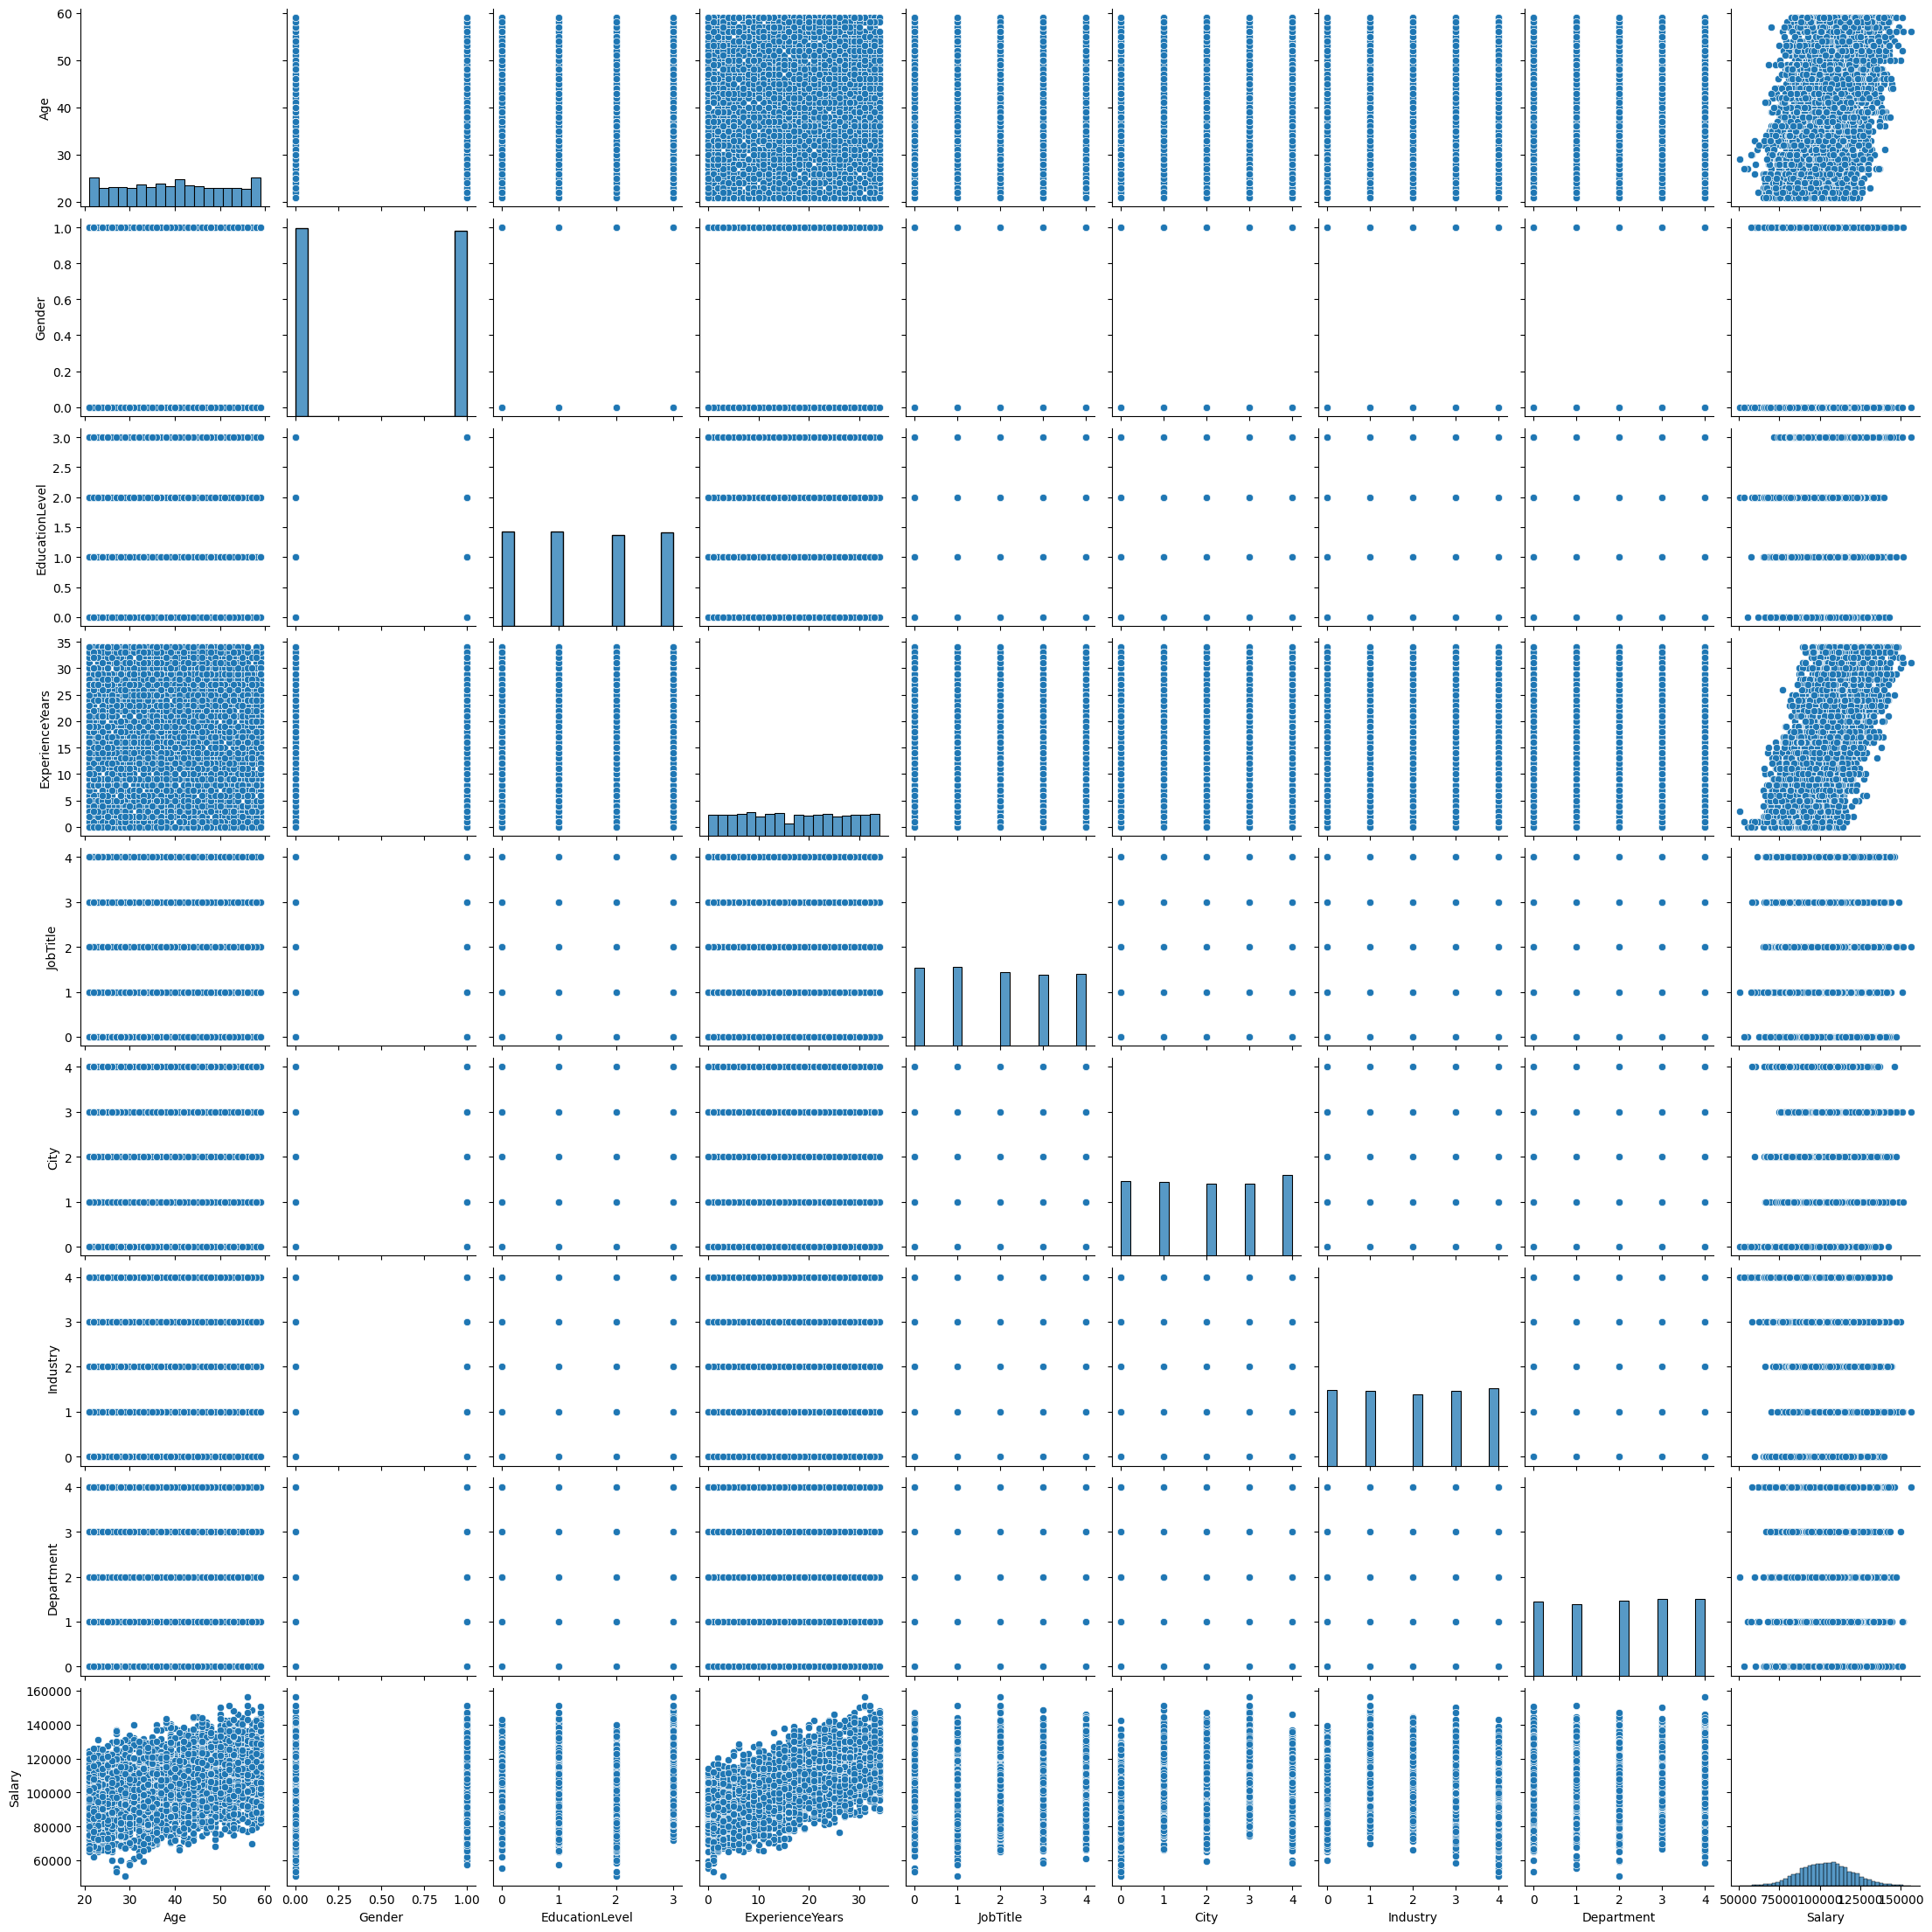

In [71]:
sns.pairplot(df)

In [72]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,JobTitle,City,Industry,Department,Salary
0,59,0,0,22,0,0,0,0,102626.11
1,32,1,1,24,0,1,0,1,107279.40
2,55,1,0,29,1,0,0,2,106390.79
3,34,1,1,28,1,0,1,3,110886.53
4,42,1,1,30,0,2,2,0,129100.78


#### Independent and dependent features

In [74]:
x=df.drop(['Salary'],axis=1)
y=df['Salary']

In [75]:
x

,Age,Gender,EducationLevel,ExperienceYears,JobTitle,City,Industry,Department
0,59,0,0,22,0,0,0,0
1,32,1,1,24,0,1,0,1
2,55,1,0,29,1,0,0,2
3,34,1,1,28,1,0,1,3
4,42,1,1,30,0,2,2,0
...,...,...,...,...,...,...,...,...
4995,48,1,1,33,4,2,4,3
4996,48,1,1,19,4,4,1,2
4997,59,0,3,6,0,3,1,0
4998,22,1,3,32,1,2,0,2


In [76]:
y

0       102626.11
1       107279.40
2       106390.79
3       110886.53
4       129100.78
          ...    
4995    111694.22
4996    110782.23
4997    128594.45
4998    107864.00
4999    121185.43
Name: Salary, Length: 5000, dtype: float64

#### Splitting the data for training and testing

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [83]:
x_train.shape,x_test.shape

((4000, 8), (1000, 8))

In [84]:
x_train

,Age,Gender,EducationLevel,ExperienceYears,JobTitle,City,Industry,Department
2733,33,1,3,0,4,3,3,3
447,45,0,3,1,4,2,1,4
970,34,1,0,16,1,2,0,4
125,26,1,3,12,0,0,1,4
798,50,1,3,1,4,1,4,0
...,...,...,...,...,...,...,...,...
1180,30,1,0,13,3,2,0,2
3441,42,0,2,6,2,0,1,1
1344,43,0,2,22,0,0,4,3
4623,42,0,1,8,3,4,3,1


### Standardization

In [85]:
scaler=StandardScaler()
scaler

StandardScaler()

In [86]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [87]:
x_train

array([[-0.62782254,  0.99750312,  1.33103053, ...,  0.67512801,
         0.6982654 ,  0.67425744],
       [ 0.454669  , -1.00250313,  1.33103053, ..., -0.0246678 ,
        -0.70598879,  1.37807522],
       [-0.53761491,  0.99750312, -1.33948717, ..., -0.0246678 ,
        -1.40811589,  1.37807522],
       ...,
       [ 0.27425374, -1.00250313,  0.44085796, ..., -1.42425943,
         1.40039249,  0.67425744],
       [ 0.18404611, -1.00250313, -0.4493146 , ...,  1.37492383,
         0.6982654 , -0.73337813],
       [ 0.90570714, -1.00250313, -0.4493146 , ..., -0.72446362,
        -0.0038617 ,  0.67425744]])

### Model training and Evaluation

#### Linear Regression

In [89]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f"r squared score : ",r2_score(y_test,y_pred))
print(f"mean_absolute_error : ",mean_absolute_error(y_test,y_pred))
print(f"mean_squared_error : ",mean_squared_error(y_test,y_pred))

r squared score :  0.6068398186125683
mean_absolute_error :  8048.13815513049
mean_squared_error :  97721483.49300006


#### Gradien boosting

In [90]:
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f"r squared score : ",r2_score(y_test,y_pred))
print(f"mean_absolute_error : ",mean_absolute_error(y_test,y_pred))
print(f"mean_squared_error : ",mean_squared_error(y_test,y_pred))

r squared score :  0.8865275987384638
mean_absolute_error :  4235.4839348520545
mean_squared_error :  28204004.148281656


#### Support Vector machine

In [91]:
model=SVR()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f"r squared score : ",r2_score(y_test,y_pred))
print(f"mean_absolute_error : ",mean_absolute_error(y_test,y_pred))
print(f"mean_squared_error : ",mean_squared_error(y_test,y_pred))

r squared score :  0.0039752052252675085
mean_absolute_error :  12668.26444187964
mean_squared_error :  247565814.51793298


#### Xgboost

In [93]:
model=XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f"r squared score : ",r2_score(y_test,y_pred))
print(f"mean_absolute_error : ",mean_absolute_error(y_test,y_pred))
print(f"mean_squared_error : ",mean_squared_error(y_test,y_pred))

r squared score :  0.8576880334530956
mean_absolute_error :  4750.83517703125
mean_squared_error :  35372189.62686709
